# MATH 189 Project

Exploring Health-Related Factors Associated with Diabetes in the United States

## Setup

In [5]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import sklearn.metrics as metrics




import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf

from scipy.stats import pearsonr


from statsmodels.stats.outliers_influence import variance_inflation_factor

import lxml

def standardize(X):
    return (X - X.mean()) / X.std()

## Porblem Statment

Diabetes is an epidemic in the United States, with its prevalence steadily increasing and making it a major public health concern. Our goal with this project is to better understand the health factors that play the biggest role in determining if someone will develop diabetes. To achieve this, we are using a comprehensive database provided by UCI, which includes both physical and mental health data on thousands of people. By analyzing these healthcare statistics and lifestyle survey information, we aim to identify the key health-related factors that contribute to the development and progression of diabetes. This research is essential for developing targeted interventions and risk assessment strategies to address the growing diabetes epidemic.

## Data

We plan to acquire data from the CDC Diabetes Health Indicators Dataset, which is available at the UCI Machine Learning Repository. This dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabete, with core features BMI, Smoker, Stroke, age, making it ideal for our analysis.

https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

The features with their description are the following:
1. `Diabetes_binary`: 
    * Target variable
    * categorical: 0 = no diabetes; 1 = prediabetes or diabetes
2. `HighBP`: 
    * categorical: 0 = no high Blood Pressure; 1 = high Blood Pressure
4. `HighChol`: 
    * categorical: 0 = no high cholesterol; 1 = high cholesterol
5. `CholCheck`: 
    * categorical: 0 = no cholesterol check in 5 years; 1 = has cholesterol check in 5 years	
6. `BMI`: 
    * discrete quantitative
    * Body Mass Index
7. `Smoker`: 
    * categorical(0 = no; 1 = yes)
    * Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
8. `Stroke`:
    * categorical(0 = no; 1 = yes)
    * (Ever told) you had a stroke
9. `HeartDiseaseorAttack`:
    * categorical(0 = no; 1 = yes)
    * coronary heart disease (CHD) or myocardial infarction (MI)
10. `PhysActivity`: 
    * categorical(0 = no; 1 = yes)
    * physical activity in past 30 days - not including job
11. `Fruits`: 
    * categorical(0 = no; 1 = yes)
    * Consume Fruit 1 or more times per day
12. `Veggies`: 
    * categorical(0 = no; 1 = yes)
    * Consume Vegetables 1 or more times per day
13. `HvyAlcoholConsump`:
    * categorical(0 = no; 1 = yes)
    * Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
14. `AnyHealthcare`: 
    * categorical(0 = no; 1 = yes)
    * Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
15. `NoDocbcCost`: 
    * categorical(0 = no; 1 = yes)		
    * Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 	
16. `GenHlth`: 
    * ordinal: 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
    * Would you say that in general your health is
17. `MentHlth`:
    * discrete quantitative
    * Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
18. `PhysHlth`: 
    * discrete quantitative 
    * Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
19. `DiffWalk`: 
    * categorical (0 = no; 1 = yes)	
    * Do you have serious difficulty walking or climbing stairs? 
20. `Sex`: 
    * categorical(0 = female; 1 = male)
21. `Age`: 
    * ordinal: 13-level age category (1 = 18-24, ..., 9 = 60-64, 13 = 80 or older)
22. `Education`: 
    * ordinal: 6-level education category (1 = Never attended school or only kindergarten, 2 = Grades 1 through 8 (Elementary), 3 = Grades 9 through 11 (Some high school), 4 = Grade 12 or GED (High school graduate), 5 = College 1 year to 3 years (Some college or technical school), 6 = College 4 years or more (College graduate))
23. `Income`: 
    * ordinal: 8-level Income scale (1 = less than 10,000, 5 = less than 35,000, 8 = 75,000 or more)

> Fistly, we load the dataset and display the first 5 rows of the dataset.

In [2]:
df = pd.read_csv("diabetes.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [3]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [4]:
df.shape

(253680, 22)

> Then we convert categorical variables in dataframe

In [5]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [6]:
categorical_vars = [col for col in df.columns if df[col].nunique() == 2]
numerical_vars = [col for col in df.columns if col not in categorical_vars]

In [7]:
for var in categorical_vars:
    df[var] = df[var].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HighBP                253680 non-null  category
 1   HighChol              253680 non-null  category
 2   CholCheck             253680 non-null  category
 3   BMI                   253680 non-null  int64   
 4   Smoker                253680 non-null  category
 5   Stroke                253680 non-null  category
 6   HeartDiseaseorAttack  253680 non-null  category
 7   PhysActivity          253680 non-null  category
 8   Fruits                253680 non-null  category
 9   Veggies               253680 non-null  category
 10  HvyAlcoholConsump     253680 non-null  category
 11  AnyHealthcare         253680 non-null  category
 12  NoDocbcCost           253680 non-null  category
 13  GenHlth               253680 non-null  int64   
 14  MentHlth              253680 non-nul

## Exploratory data analysis

**Univariate Analysis**

In the univariate analysis, we analyze the distribution of all variables independently.

Firstly, let's check the descriptive statistics of the numerical variables.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
GenHlth,253680.0,2.511392,1.068477,1.0,2.0,2.0,3.0,5.0
MentHlth,253680.0,3.184772,7.412847,0.0,0.0,0.0,2.0,30.0
PhysHlth,253680.0,4.242081,8.717951,0.0,0.0,0.0,3.0,30.0
Age,253680.0,8.032119,3.054220,1.0,6.0,8.0,10.0,13.0
Education,253680.0,5.050434,0.985774,1.0,4.0,5.0,6.0,6.0
Income,253680.0,6.053875,2.071148,1.0,5.0,7.0,8.0,8.0


Now let's look at histograms for these variables to help visualize the distributions.

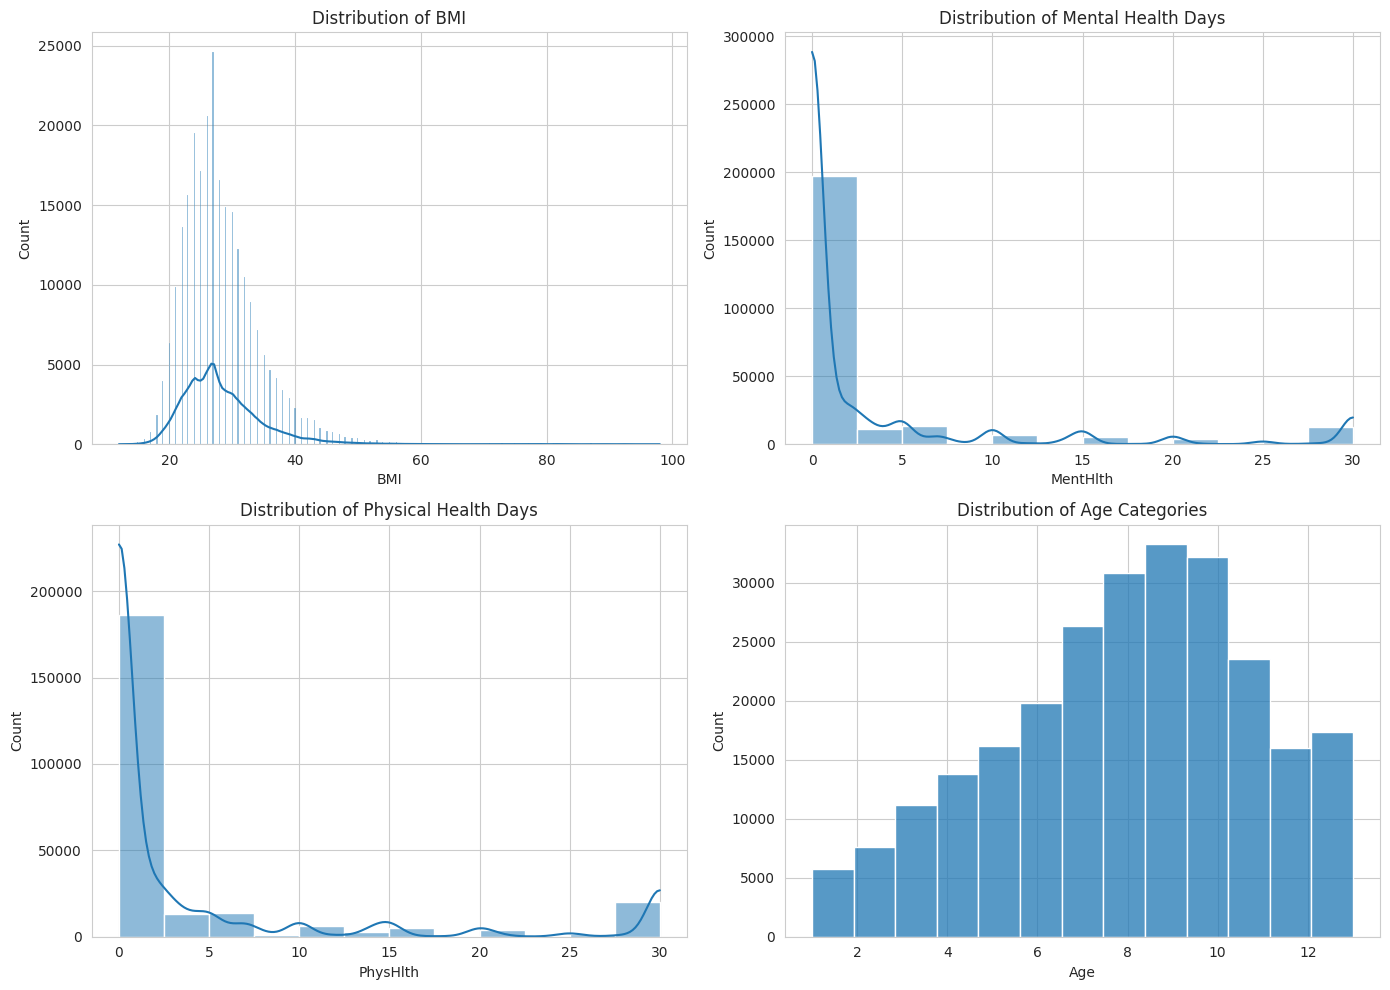

In [11]:
sns.set_style("whitegrid")

# Prepare a figure to plot multiple histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot histograms for BMI, MentHlth, PhysHlth, and Age
sns.histplot(df['BMI'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of BMI')

sns.histplot(df['MentHlth'], bins=12, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Mental Health Days')

sns.histplot(df['PhysHlth'], bins=12, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Physical Health Days')

sns.histplot(df['Age'], bins=13, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Age Categories')

plt.tight_layout()
plt.show()

**Bivariate Analysis**

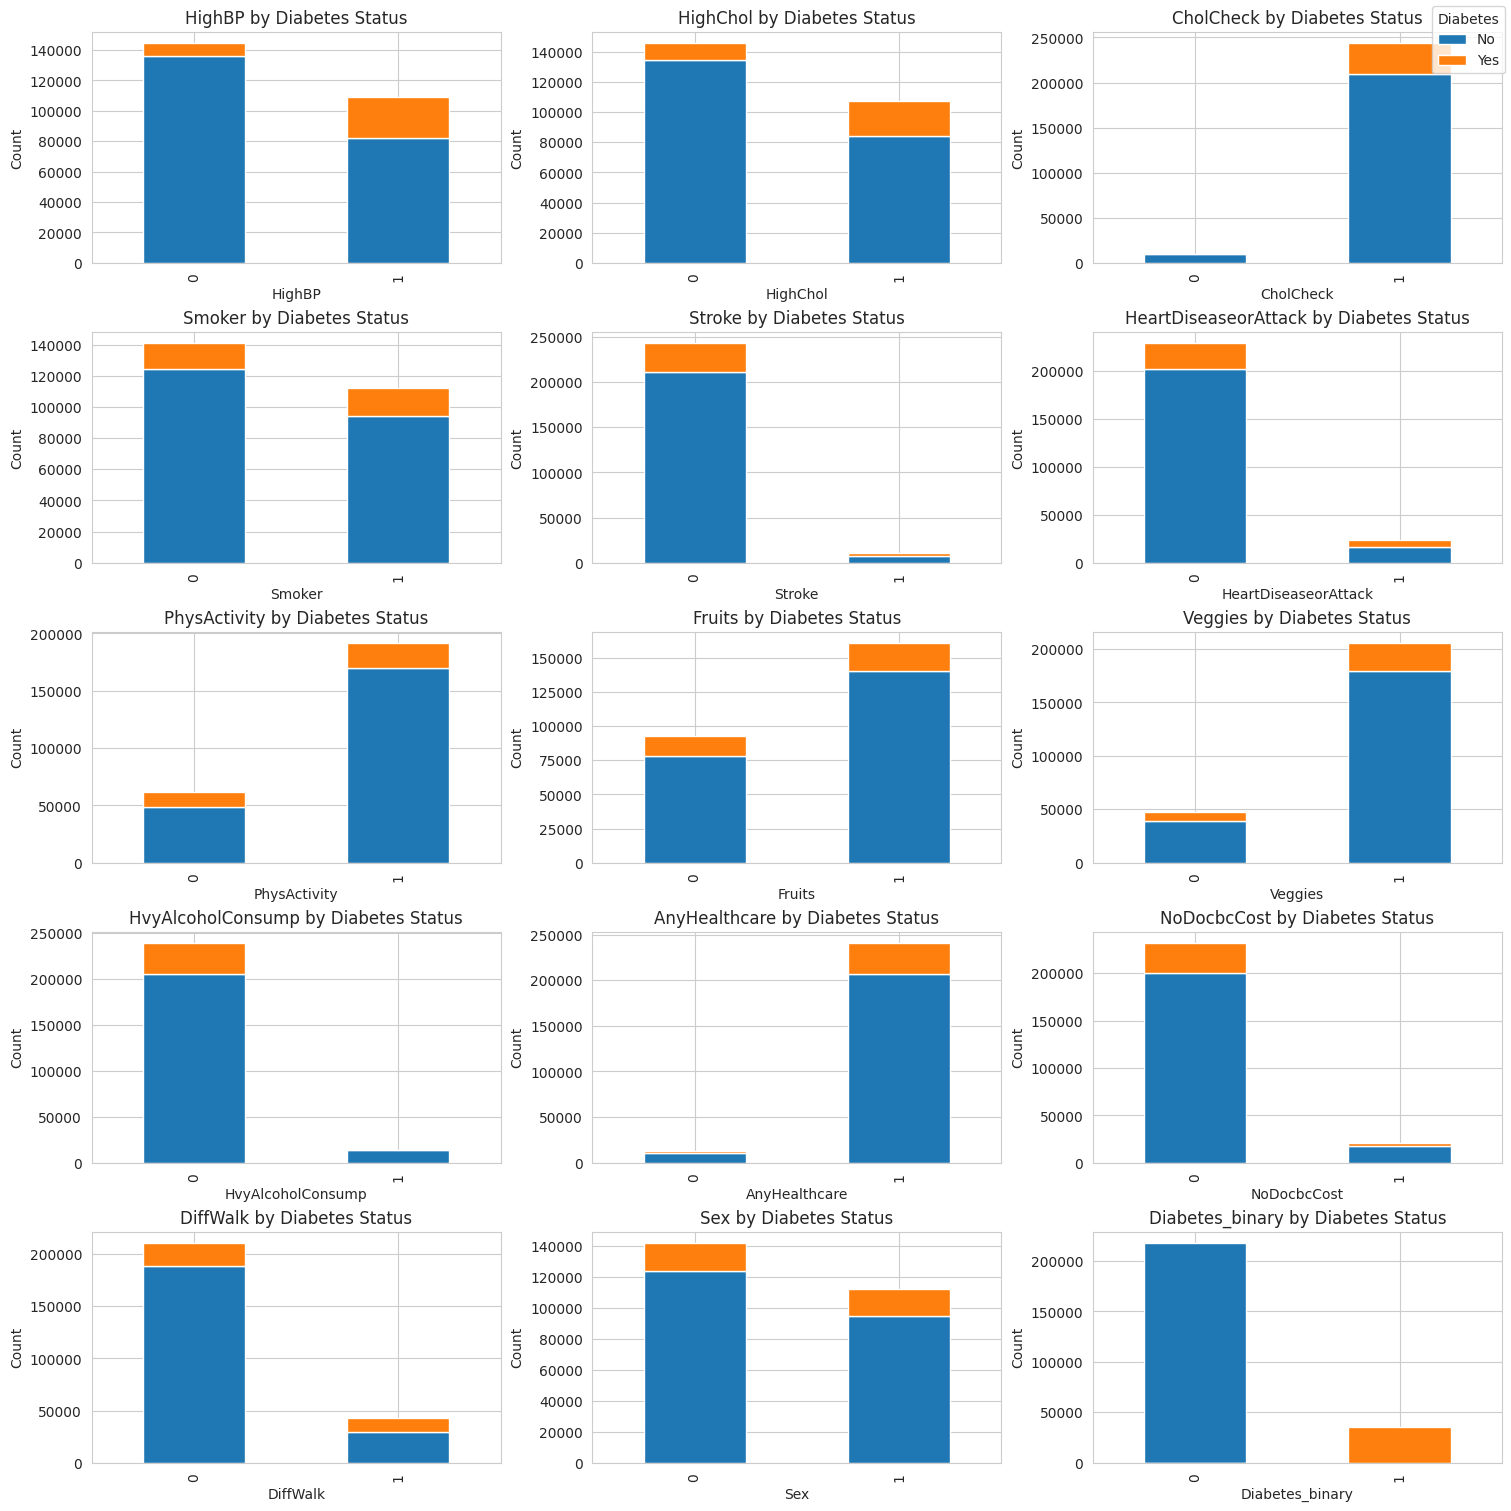

In [12]:
# Calculate the number of rows needed for the grid of binary variables
n_categorical_vars = len(categorical_vars)
n_cols = 3  # Number of columns in the grid
n_rows = (n_categorical_vars + n_cols - 1) // n_cols  # Calculate rows needed

# Setting up the grid for stacked bar charts
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,15), constrained_layout=True)
axes = axes.flatten()  # Flatten the array to iterate easily

# Generate stacked bar charts for each binary variable
for ax, var in zip(axes, categorical_vars):
    pd.crosstab(df[var], df['Diabetes_binary']).plot(kind='bar', stacked=True, ax=ax, legend=None)
    ax.set_title(f'{var} by Diabetes Status')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

# Remove unused axes
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])

fig.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

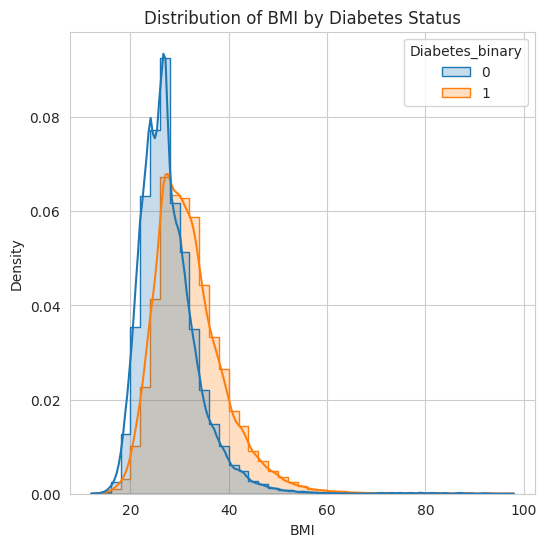

In [47]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(df, x='BMI', bins=60, binwidth=2, hue='Diabetes_binary', hue_order=[0, 1], ax=ax, fill=True, element='step', kde=True, stat='density', multiple='layer', common_norm=False)
ax.set_title('Distribution of BMI by Diabetes Status')
ax.set_xlabel('BMI')
ax.set_ylabel('Density')

plt.show()

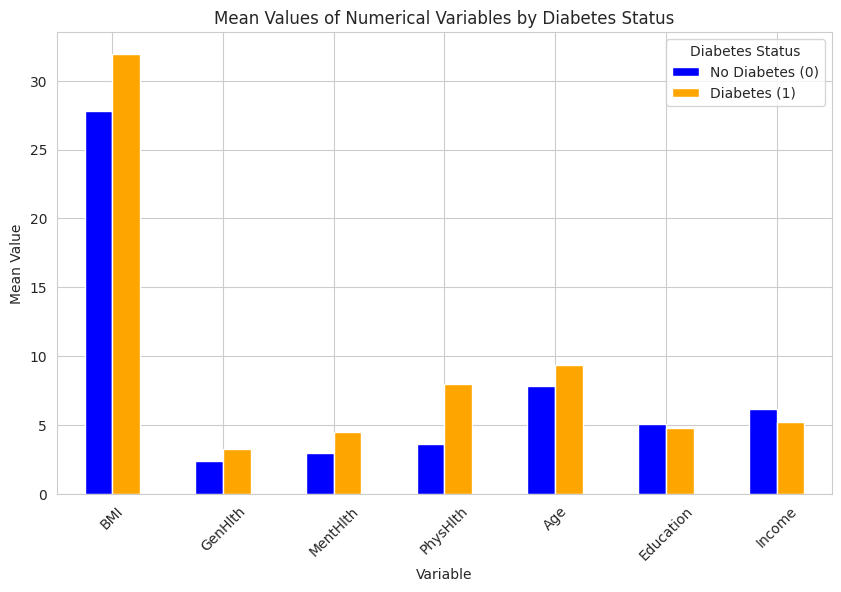

In [14]:
# Calculate the mean of each numerical variable for each diabetes status
means = df.groupby('Diabetes_binary')[numerical_vars].mean()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
means.T.plot(kind='bar', ax=ax, color=['blue', 'orange'])
ax.set_title('Mean Values of Numerical Variables by Diabetes Status')
ax.set_xlabel('Variable')
ax.set_ylabel('Mean Value')
ax.set_xticklabels(numerical_vars, rotation=45)
ax.legend(title='Diabetes Status', labels=['No Diabetes (0)', 'Diabetes (1)'])

plt.show()

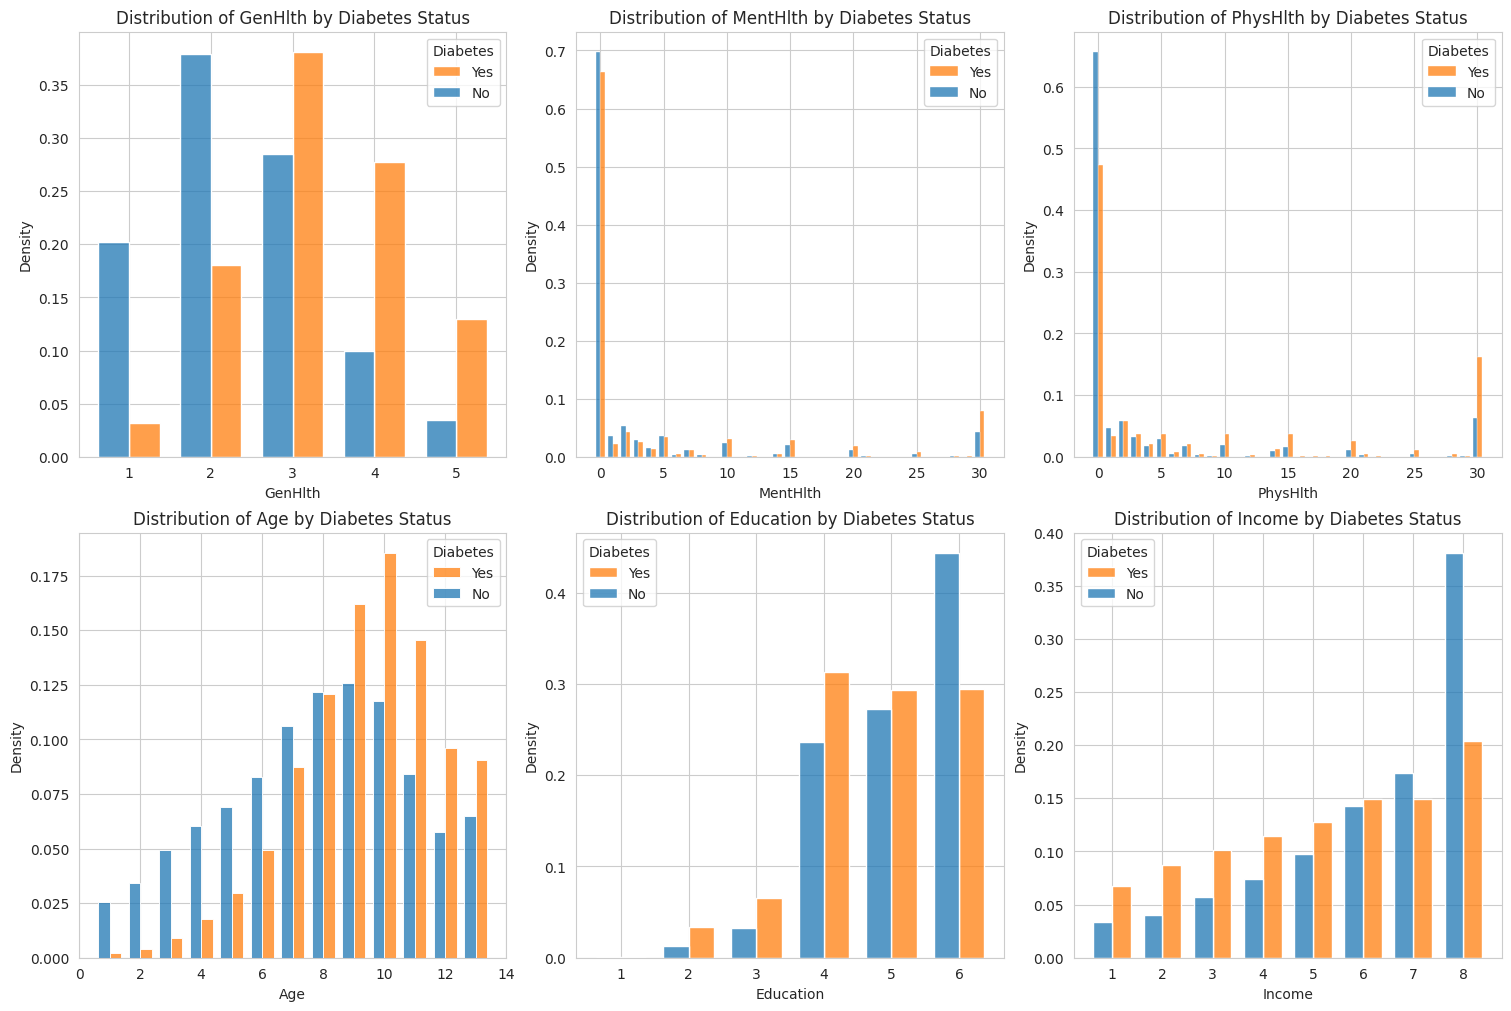

In [15]:
# Setting up the grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10), constrained_layout=True)
axes = axes.flatten()  # Flatten the array to iterate easily

# Creating overlaid histograms for each numerical variable
for ax, var in zip(axes, numerical_vars[1:]):
    sns.histplot(df, x=var, discrete=True, hue='Diabetes_binary', hue_order=[0,1], ax=ax, element='bars', stat='density', multiple='dodge', common_norm=False, shrink=0.75)
    ax.set_title(f'Distribution of {var} by Diabetes Status')
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.legend(title='Diabetes', labels=['Yes', 'No'])
    
# Remove unused axes
for i in range(len(numerical_vars), len(axes)):
    fig.delaxes(axes[i])

plt.show()

In [16]:
categorical_vars

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex',
 'Diabetes_binary']

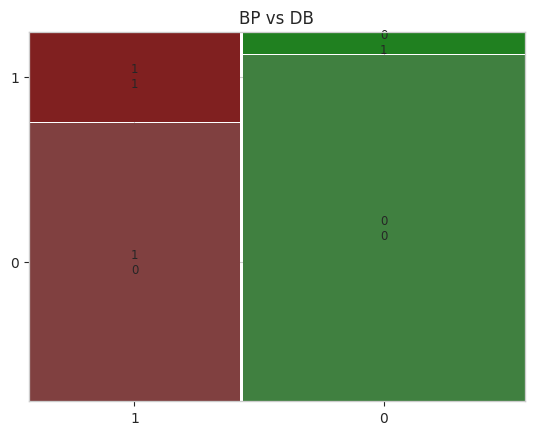

{('1', '0'): (0.0, 0.0, 0.42686676990324324, 0.7530329897593924),
 ('1', '1'): (0.0,
  0.7563552488956049,
  0.42686676990324324,
  0.24364475110439499),
 ('0', '0'): (0.43184189428135267,
  0.0,
  0.5681581057186473,
  0.9365265730387035),
 ('0', '1'): (0.43184189428135267,
  0.939848832174916,
  0.5681581057186473,
  0.060151167825083895)}

In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd

fig, rects = mosaic(df, ['HighBP', 'Diabetes_binary'], title='BP vs DB', axes_label=True)
plt.show()
rects

## Inferential Analysis

## Hypothesis Test 1

For my hypothesis test, I am hypothesizing that various columns will have adverse effects on whether or not someone will have diabetes. I am going to run 3 seperate t-tests in order to test if someones BMI, mental health, or physical health can indicate whether someone is more or less likely to get diabetes.

**H0**: The mean of the values in 'BMI', 'MentHlth' and 'PhysHlth' columns will be roughly the same for patients with diabetes and those without.

**H1**: The mean of the values in the 'BMI', 'MentHlth' and 'PhysHlth' columns will be significantly different for the patients with diabetes compared to patients without diabetes.

In [ ]:
var = ['BMI', 'MentHlth', 'PhysHlth']

t_results = {}

for var in var:
    group1 = df[df['Diabetes_binary'] == 0][var]
    group2 = df[df['Diabetes_binary'] == 1][var]
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True, permutations=100, alternative='less')
    t_results[var] = p_val


print("T-Test Results:")
for var, p_val in t_results.items():
    print(f"{var}: p-value = {p_val}")


**Results**

According the the p-values, BMI, physical health and mental health are all strong indicators of a patients alikelihood to end up with diabetes. All of the columns showed a p-value of 0 which indicates that there is very significant differences in their values for patients with diabetes compared to those without. 


Upon further analysis, it may appear that columns such as the mental health columns might not directly effect whether or not a patient has diabetes. Instead, it is likely that mental health is conditionally indepedent from diabetes, given other factors such as physical health or BMI.

## Hypothesis Test 2

For the second hypothesis test, I am going to test the validity of the first hypothesis test to see if mental health really does cause diabetes or both are caused by physical health. I am going to find the correlation between mental and physical health by using a linear regression model between mental health and physical health values, then I will fit a linear regression model for diabetes and physical health. Finally I will find the correlation between the residuals to conclude whether or not there is conditional independence.

**H0**: Mental health and diabetes are conditionally independent given phyiscal health.

**H1**: Mental health and diabetes are not conditionally independent given phyiscal health.


In [3]:
X1 = sm.add_constant(df['PhysHlth'])
model1 = sm.OLS(df['MentHlth'], X1).fit()
residuals_menthlth = model1.resid

X2 = sm.add_constant(df['PhysHlth'])
model2 = sm.OLS(df['Diabetes_binary'], X2).fit()
residuals_diabetes = model2.resid

correlation, p_value = pearsonr(residuals_menthlth, residuals_diabetes)

print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

NameError: name 'df' is not defined

**Results**

The correlation was not strong enough and therefore we must reject the null hypothesis. Mental health and diabetes are NOT conditionally independent given phyiscal health.

## Logistic Regression Model

The relationship is not apparent in scatterplot visualization, it is necessary to assess the results of a logistic regression to determine whether there is a statistically significant relationship between variables and diabetes.

In the modeling phase, we use logistic regression to build a predictive model for diabetes. The model formula is created with `Diabetes_binary` as the response variable and other variables as predictors.

In [20]:
df = pd.read_csv("diabetes.csv")
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                    'NoDocbcCost', 'DiffWalk', 'Sex']

for var in categorical_vars:
    df[var] = df[var].astype('category')

In [21]:
response = 'Diabetes_binary'
covariates = df.columns.drop(response)
formula = f"{response} ~ {' + '.join(covariates)}"
formula

'Diabetes_binary ~ Unnamed: 0 + HighBP + HighChol + CholCheck + BMI + Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + Income'

And here is our baseline logistic regression model

In [22]:
model = smf.logit(formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.319662
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253658
Method:                           MLE   Df Model:                           21
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                  0.2083
Time:                        20:08:41   Log-Likelihood:                -81092.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -7.8362      0.094    -83.760      0.000      -8.

Using a significance level of 5%, we identified the covariates that exhibit statistically significant associations with the response variable, `Diabetes_binary`, based on their corresponding p-values from the logistic regression model analysis.

In [23]:
alpha = 0.05
summary_table = model.summary().tables[1].as_html()
summary_df = pd.read_html(summary_table, header=0, index_col=0)[0]
p_values = summary_df['P>|z|']

stats_sig = []

for i in range(len(p_values)):
    if p_values.values[i] < alpha:
        stats_sig.append(p_values.index[i])

stats_sig

['Intercept',
 'HighBP[T.1]',
 'HighChol[T.1]',
 'CholCheck[T.1]',
 'Stroke[T.1]',
 'HeartDiseaseorAttack[T.1]',
 'PhysActivity[T.1]',
 'Fruits[T.1]',
 'Veggies[T.1]',
 'HvyAlcoholConsump[T.1]',
 'AnyHealthcare[T.1]',
 'DiffWalk[T.1]',
 'Sex[T.1]',
 'BMI',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Age',
 'Education',
 'Income']

After analyzing the data with a significance level set at 5%, we discovered that all covariates, with the exception of `Smoker` and `NoDocbcCost`, are statistically significant predictors of `Diabetes_binary`. Consequently, our next step involves constructing a revised logistic regression model that includes only these statistically significant covariates. This new model will enable us to focus exclusively on the variables that have demonstrated a significant association with the outcome variable, streamlining our analysis for improved accuracy and relevance.

In [24]:
endog = df['Diabetes_binary']
exog = sm.add_constant(df.drop(columns=['Diabetes_binary', 'Smoker', 'NoDocbcCost']))

model2 = sm.Logit(endog, exog)
result = model2.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.319663
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253659
Method:                           MLE   Df Model:                           20
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                  0.2083
Time:                        20:10:18   Log-Likelihood:                -81092.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.8418      0.093    -84.306      0.000      -8.024      -7.659

Then, we revised logistic regression model to incorporate interaction terms to capture potential nonlinear relationships and interactions between variables. The model equation includes terms such as Age multiplied by HighBP, Age multiplied by HighChol, Age multiplied by BMI, BMI multiplied by PhysActivity, as well as individual terms for CholCheck, Stroke, HvyAlcoholConsump, HeartDiseaseorAttack, Fruits, Veggies, AnyHealthcare, MentHlth, GenHlth multiplied by PhysHlth, DiffWalk, Sex, Education, and Income.

In [25]:
lr_new_formula = 'Diabetes_binary ~ Age * HighBP + Age * HighChol + Age * BMI + BMI * PhysActivity + CholCheck + Stroke + HvyAlcoholConsump + HeartDiseaseorAttack + Fruits + Veggies + AnyHealthcare + MentHlth + GenHlth * PhysHlth + DiffWalk + Sex + Education + Income'
model3 = smf.logit(lr_new_formula, data=df).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.317354
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253655
Method:                           MLE   Df Model:                           24
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                  0.2140
Time:                        20:11:15   Log-Likelihood:                -80506.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -7.2647      0.134    -54.050      0.000      -7.

After fitting the expanded logistic regression model, which includes interaction terms, we observed successful optimization with a current function value of 0.319663 and 8 iterations. The model's pseudo R-squared value remains consistent at 0.2083, indicating that the model still explains about 20.83% of the variability in the response variable, `Diabetes_binary`.

When interpreting each coefficient associated with the covariates in the new logistic regression model (`model3`), we gain insights into the impact of various factors on the log-odds of diabetes, providing a comprehensive understanding of how each predictor contributes to the likelihood of the outcome variable.

**Main effects**: 
1. Interpretation of `Intercept`: This is the log-odds of having diabetes when all other variables are zero. Without considering any risk factors or demographic variables, the log-odds of having diabetes are very low. 
2. Interpretation of `HighBP[T.1]`: Having high blood pressure increases the log-odds of diabetes by 1.2826 compared to not having high blood pressure, holding all other variables constant.
3. Interpretation of `HighChol[T.1]`: Having high cholesterol increases the log-odds of diabetes by 1.3716 compared to not having high cholesterol, holding all other variables constant.
4. Interpretation of `PhysActivity[T.1]`: Engaging in physical activity decreases the log-odds of diabetes by 0.2353 compared to not engaging in physical activity, holding all other variables constant.
5. Interpretation of `CholCheck[T.1]`: Having had a cholesterol check in 5 years increases the log-odds of diabetes by 1.2249 compared to not having a cholesterol check, holding all other variables constant.
6. Interpretation of `Stroke[T.1]`: Having had a stroke increases the log-odds of diabetes by 0.1584 compared to not having had a stroke, holding all other variables constant.
7. Interpretation of `HvyAlcoholConsump[T.1]`: Being a heavy alcohol consumer decreases the log-odds of diabetes by 0.7782 compared to not being a heavy alcohol consumer, holding all other variables constant.
8. Interpretation of `HeartDiseaseorAttack[T.1]`: Having had heart disease or a heart attack increases the log-odds of diabetes by 0.2459 compared to not having had heart disease or a heart attack, holding all other variables constant.
9. Interpretation of `Fruits[T.1]`: Consuming fruits daily decreases the log-odds of diabetes by 0.0407 compared to not consuming fruits daily, holding all other variables constant.
10. Interpretation of `Veggies[T.1]`: Consuming vegetables daily decreases the log-odds of diabetes by 0.0307 compared to not consuming vegetables daily, holding all other variables constant.
11. Interpretation of `AnyHealthcare[T.1]`: Having any healthcare coverage increases the log-odds of diabetes by 0.0822 compared to not having healthcare coverage, holding all other variables constant.
12. Interpretation of `DiffWalk[T.1]`: Having difficulty walking increases the log-odds of diabetes by 0.1042 compared to not having difficulty walking, holding all other variables constant.
13. Interpretation of `Sex[T.1]`: Being male increases the log-odds of diabetes by 0.2391 compared to being female, holding all other variables constant.
14. Interpretation of `Age`: Each unit increase in the age category increases the log-odds of diabetes by 0.0441, holding all other variables constant.
15. Interpretation of `BMI` :Each unit increase in BMI increases the log-odds of diabetes by 0.0114, holding all other variables constant.
16. Interpretation of `MentHlth`: Each additional day of poor mental health in the past 30 days decreases the log-odds of diabetes by 0.0030, holding all other variables constant.
17. Interpretation of `GenHlth` :Each unit increase in the general health score (where higher values indicate worse health) increases the log-odds of diabetes by 0.6145, holding all other variables constant.
18. Interpretation of `PhysHlth`: Each additional day of poor physical health in the past 30 days increases the log-odds of diabetes by 0.0399, holding all other variables constant.
19. Interpretation of `Education`: Each unit increase in education level decreases the log-odds of diabetes by 0.0240, holding all other variables constant.
20. Interpretation of `Income`: Each unit increase in income level decreases the log-odds of diabetes by 0.0526, holding all other variables constant.

**Regarding interaction effects:**:
1. Interpretation of `Age:HighBP[T.1]`: The effect of age on the log-odds of diabetes is moderated by having high blood pressure. Specifically, each unit increase in age combined with having high blood pressure decreases the log-odds of diabetes by an additional 0.0610.

2. Interpretation of `Age:HighChol[T.1]`: The effect of age on the log-odds of diabetes is moderated by having high cholesterol. Specifically, each unit increase in age combined with having high cholesterol decreases the log-odds of diabetes by an additional 0.0881.

3. Interpretation of `BMI:PhysActivity[T.1]`: The effect of BMI on the log-odds of diabetes is moderated by physical activity. Specifically, each unit increase in BMI combined with engaging in physical activity increases the log-odds of diabetes by an additional 0.0062.

19. Interpretation of `Age:BMI`: The effect of BMI on the log-odds of diabetes is further moderated by age. Specifically, each unit increase in BMI combined with each unit increase in age increases the log-odds of diabetes by an additional 0.0054.

23. Interpretation of `GenHlth:PhysHlth`: The effect of general health on the log-odds of diabetes is moderated by physical health. Specifically, each unit increase in the general health score combined with each additional day of poor physical health decreases the log-odds of diabetes by an additional 0.0124.

In conclusion, the logistic regression model (`model3`) with interaction terms provides a detailed understanding of how various factors influence the log-odds of diabetes, shedding light on the complex interplay between demographic, lifestyle, and health-related variables. We will now evaluate the model's performance, assess its assumptions, and explore any potential areas for improvement or further investigation in our model diagnostics section.

### Model Diagnostics

After conducting model diagnostics for model3, which includes assessing fitted values, residuals, confusion matrix, classification accuracy, ROC curve, and AUC score, several key insights into the model's performance and predictive ability have been revealed. 

> Fitted values and residuals

The scatter plot of residuals demonstrates a random distribution around zero, indicating that the model's errors are unbiased and consistent across the range of predicted values.

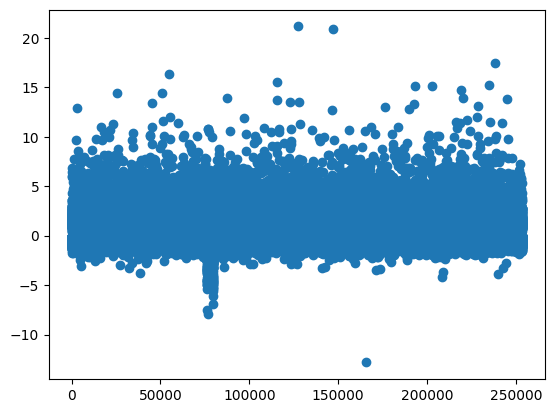

In [18]:
residuals = model3.resid_pearson
plt.scatter(range(len(residuals)), residuals)

> confusion matrix and classification accuracy of `model3`.

The confusion matrix, derived from model3, provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions, contributing to a comprehensive evaluation of the model's predictive performance. The accuracy of 0.8636 indicates that this logistic regression model correctly classifies approximately 86.47% of the instances.

In [19]:
c_matrix = model3.pred_table(threshold=0.5)
c_matrix

array([[213914.,   4420.],
       [ 29899.,   5447.]])

In [20]:
accuracy = (c_matrix[0,0] + c_matrix[1,1]) / c_matrix.sum()
accuracy

0.8647153894670451

> ROC curve and AUC score of `model2`.

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the trade-off between the true positive rate and the false positive rate for every possible cut-off value. By examining specific thresholds in the ROC curve, such as the threshold around 0.1, we can gain further insights into the model's performance at different decision points. An AUC score of 0.8247 suggests that the model is fairly accurate, and it has a good ability to discriminate between the positive and negative classes. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


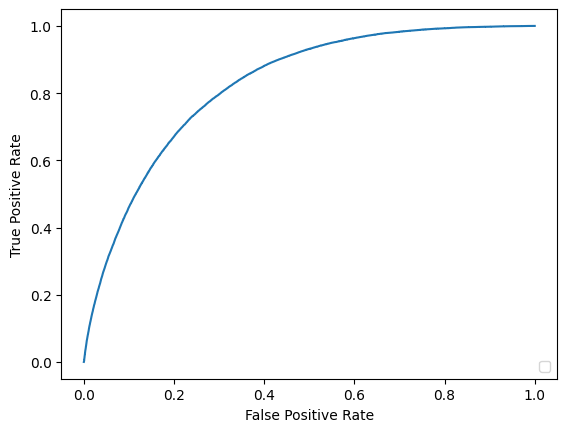

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(df['Diabetes_binary'], model3.predict(df))

indx = (0.1 - 5e-3 <= thresholds) * (thresholds <= 0.1 + 5e-3)
tpr[indx], fpr[indx],  thresholds[indx]

metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [22]:
metrics.roc_auc_score(df['Diabetes_binary'], model3.predict(df))

0.8247132394294344

## Limitations and Shortcoming

This model discussed above demonstrates several strengths in its ability to predict diabetes outcomes based on a range of factors such as demographics, lifestyle choices, and health indicators. However, it's crucial to recognize the limitations and potential shortcomings that could affect the model's performance and reliability.

Imbalanced data poses a significant challenge to our project. Since the dataset used to train the model is highly imbalanced, where the diabetes-negative cases significantly outnumbers the other, the model may exhibit bias toward the majority class. This can result in lower performance metrics, particularly for predicting minority classes, which is the diabetes-positive cases. In the future, we may use techniques such as resampling methods or adjusting class weights during model training to mitigate this imbalance issue.

Additionally, the model's predictive power may be limited by the complexity of the health condition it aims to predict. Diabetes is a multifactorial disease influenced by numerous genetic, lifestyle, and environmental factors. Achieving extremely high accuracy in predicting diabetes outcomes can be challenging due to this complexity and individual variability.

Furthermore, the generalizability of the model should be considered. While the dataset provides a rich source of information, the findings and conclusions drawn from the model may not be universally applicable to all populations. Factors such as cultural differences, regional variations in healthcare systems, and unique genetic predispositions could influence diabetes risk differently across groups. Therefore, while the model offers valuable insights into diabetes risk factors and can guide targeted interventions, its generalizability should be interpreted cautiously. Validation across diverse datasets and populations, along with sensitivity analyses to assess robustness, would further enhance confidence in the model's ability to generalize findings effectively.

By addressing these limitations, we can improve the model's accuracy and utility, ultimately supporting more effective interventions and healthcare strategies for diabetes management.

## Team Contributions

- Kai Breese:
Datasets, Univariate Analysis, Bivariate Analysis
- Hunter Brownell:
Hypothesis Test
- Yishan Cai:
Logistic Regression Model, Model Diagnostics, Limitation Discussion